## Preprocessing

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
df = application_df.copy()

In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE

df.drop(columns=["EIN", "NAME"], inplace=True)

In [109]:
df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [8]:
df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [9]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
nunique_rows = []

for col in df.columns:
    temp_dict = {}
    temp_dict['column'] =  col
    temp_dict['Number of Unique'] = df[col].nunique()
    nunique_rows.append(temp_dict)
    #print(nunique_rows)

pd.DataFrame(nunique_rows)

,column,Number of Unique
0,APPLICATION_TYPE,17
1,AFFILIATION,6
2,CLASSIFICATION,71
3,USE_CASE,5
4,ORGANIZATION,4
5,STATUS,2
6,INCOME_AMT,9
7,SPECIAL_CONSIDERATIONS,2
8,ASK_AMT,8747
9,IS_SUCCESSFUL,2


In [10]:
object_cols = [col for col in df.columns if df[col].dtype == 'O']
object_cols

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE

for col in object_cols:
    print(col)
    print(df[col].value_counts())
    print()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

INCOME

In [12]:
dfapp = df.APPLICATION_TYPE.value_counts()

application_types_to_replace = dfapp.loc[dfapp.values < 525].index.tolist()

In [13]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE

dfclass = df.CLASSIFICATION.value_counts()
dfclass

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [15]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
dfclass.loc[dfclass.values > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [16]:
classifications_to_replace = dfclass.loc[dfclass.values < 1882].index.tolist()
len(classifications_to_replace)

66

In [17]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [18]:
object_cols

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [19]:
df_obj = df.loc[:, object_cols]
df_obj

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,T10,Independent,C1000,ProductDev,Association,0,N
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,N
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N
34297,T5,Independent,C3000,ProductDev,Association,0,N


In [22]:
df_categ

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34295,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34296,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34297,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [21]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
pd.set_option('display.max_columns', None)
df_categ = pd.get_dummies(df_obj)
df_full = pd.concat([df, df_categ], axis=1)
df_full.drop(columns = object_cols, inplace=True)
df_full

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [23]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

X = df_full.drop("IS_SUCCESSFUL", axis=1).values
y = df_full.loc[:, ["IS_SUCCESSFUL"]].values.ravel()

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.8 : 0.2


In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)


# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [69]:
#y_scaler = scaler.fit(y_train)
y_train_scaled = y_train.reshape(-1,1)
y_test_scaled = y_test.reshape(-1,1)

## Compile, Train and Evaluate the Model

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=10, activation="sigmoid", input_shape=[43]))

# Second hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=6, activation="relu"))


# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=2, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                440       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
Total params: 520
Trainable params: 520
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
#  YOUR CODE GOES HERE

nn.compile(loss="mae", optimizer="adam", metrics=["accuracy"])

In [27]:
# Train the model
#  YOUR CODE GOES HERE

fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
858/858 [==============================] - 4s 3ms/step - loss: 0.3404 - accuracy: 0.5665
Epoch 2/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2829 - accuracy: 0.5942
Epoch 3/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2779 - accuracy: 0.6058
Epoch 4/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2755 - accuracy: 0.5956
Epoch 5/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2744 - accuracy: 0.6003
Epoch 6/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2739 - accuracy: 0.5970
Epoch 7/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2729 - accuracy: 0.5968
Epoch 8/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2723 - accuracy: 0.5993
Epoch 9/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2717 - accuracy: 0.5984
Epoch 10/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2713 - accura

858/858 [==============================] - 2s 2ms/step - loss: 0.2670 - accuracy: 0.6059
Epoch 82/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2670 - accuracy: 0.6062
Epoch 83/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2668 - accuracy: 0.6071
Epoch 84/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2674 - accuracy: 0.6005
Epoch 85/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2674 - accuracy: 0.6016
Epoch 86/100
858/858 [==============================] - 2s 3ms/step - loss: 0.2674 - accuracy: 0.5993
Epoch 87/100
858/858 [==============================] - 2s 3ms/step - loss: 0.2687 - accuracy: 0.5974
Epoch 88/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2684 - accuracy: 0.6033
Epoch 89/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2685 - accuracy: 0.5963
Epoch 90/100
858/858 [==============================] - 2s 2ms/step - loss: 0.2683 - accuracy: 

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.2791 - accuracy: 0.5249 - 573ms/epoch - 3ms/step
Loss: 0.27914634346961975, Accuracy: 0.5249271392822266


In [99]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn2 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn2.add(tf.keras.layers.Dense(units=6, activation="relu", input_shape=[43]))

# Second hidden layer
#  YOUR CODE GOES HERE

nn2.add(tf.keras.layers.Dense(units=4, activation="relu"))


# Output layer
#  YOUR CODE GOES HERE

nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 6)                 264       
                                                                 
 dense_44 (Dense)            (None, 4)                 28        
                                                                 
 dense_45 (Dense)            (None, 1)                 5         
                                                                 
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


In [100]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
nn2.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
fit_model2 = nn2.fit(X_train_scaled, y_train, epochs=10, batch_size = 2048)

Epoch 1/10
14/14 [==============================] - 6s 9ms/step - loss: 0.6446 - accuracy: 0.6610
Epoch 2/10
14/14 [==============================] - 0s 9ms/step - loss: 0.5768 - accuracy: 0.7183
Epoch 3/10
14/14 [==============================] - 0s 7ms/step - loss: 0.5669 - accuracy: 0.7217
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5639 - accuracy: 0.7211
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5607 - accuracy: 0.7235
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5589 - accuracy: 0.7249
Epoch 7/10
14/14 [==============================] - 0s 4ms/step - loss: 0.5570 - accuracy: 0.7260
Epoch 8/10
14/14 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.7278
Epoch 9/10
14/14 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.7286
Epoch 10/10
14/14 [==============================] - 0s 4ms/step - loss: 0.5526 - accuracy: 0.7285


In [101]:
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.5617 - accuracy: 0.7249 - 710ms/epoch - 3ms/step
Loss: 0.5616860389709473, Accuracy: 0.7249271273612976


In [95]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn3 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn3.add(tf.keras.layers.Dense(units=20, activation="relu", input_shape=[43]))

# Second hidden layer
#  YOUR CODE GOES HERE

nn3.add(tf.keras.layers.Dense(units=10, activation="relu"))
nn3.add(tf.keras.layers.Dense(units=4, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE

nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 20)                880       
                                                                 
 dense_40 (Dense)            (None, 10)                210       
                                                                 
 dense_41 (Dense)            (None, 4)                 44        
                                                                 
 dense_42 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,139
Trainable params: 1,139
Non-trainable params: 0
_________________________________________________________________


In [96]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
nn3.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
fit_model3 = nn3.fit(X_train_scaled, y_train, epochs=10, batch_size = 1024)

Epoch 1/10
27/27 [==============================] - 2s 4ms/step - loss: 0.6377 - accuracy: 0.6376
Epoch 2/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5859 - accuracy: 0.7153
Epoch 3/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.7275
Epoch 4/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.7252
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5770 - accuracy: 0.7246
Epoch 6/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5738 - accuracy: 0.7243
Epoch 7/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5633 - accuracy: 0.7285
Epoch 8/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5640 - accuracy: 0.7289
Epoch 9/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.7311
Epoch 10/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.7299


In [97]:
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test_scaled,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.5714 - accuracy: 0.7252 - 606ms/epoch - 3ms/step
Loss: 0.5713668465614319, Accuracy: 0.725218653678894


New model after dropping "SPECIAL_CONSIDERATIONS" and "STATUS" columns.

In [111]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

X2 = df_full.drop(["IS_SUCCESSFUL", "SPECIAL_CONSIDERATIONS_N", "SPECIAL_CONSIDERATIONS_Y", "STATUS"], axis=1).values
y2 = df_full.loc[:, ["IS_SUCCESSFUL"]].values.ravel()

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=.2, random_state=42) # use stratify for classification models
print(f"{round(len(X_train2)/len(X2), 3)} : {round(len(X_test2)/len(X2), 3)}")

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler2 = scaler.fit(X_train2)


# Scale the data
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

#y_scaler = scaler.fit(y_train)
y_train_scaled2 = y_train2.reshape(-1,1)
y_test_scaled2 = y_test2.reshape(-1,1)


0.8 : 0.2


In [114]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn22 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn22.add(tf.keras.layers.Dense(units=6, activation="relu", input_shape=[40]))

# Second hidden layer
#  YOUR CODE GOES HERE

nn22.add(tf.keras.layers.Dense(units=4, activation="relu"))


# Output layer
#  YOUR CODE GOES HERE

nn22.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn22.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.02)
nn22.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
fit_model22 = nn22.fit(X_train_scaled2, y_train2, epochs=10, batch_size = 2048)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 6)                 246       
                                                                 
 dense_50 (Dense)            (None, 4)                 28        
                                                                 
 dense_51 (Dense)            (None, 1)                 5         
                                                                 
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 2s 5ms/step - loss: 0.6710 - accuracy: 0.6268
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 0.6154 - accuracy: 0.7126
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5894 - accuracy: 0.7270
Epoch 4/10
14/14 [=======

In [118]:
model_loss2, model_accuracy2 = nn22.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")

215/215 - 1s - loss: 0.5677 - accuracy: 0.7258 - 725ms/epoch - 3ms/step
Loss: 0.5676840543746948, Accuracy: 0.7258017659187317


215/215 [==============================] - 1s 2ms/step

METRICS FOR THE TESTING SET:
----------------------------
[[2083 1113]
 [ 774 2890]]

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      3196
           1       0.72      0.79      0.75      3664

    accuracy                           0.72      6860
   macro avg       0.73      0.72      0.72      6860
weighted avg       0.73      0.72      0.72      6860



AUC for the Model Test Set: 0.7755224017740516


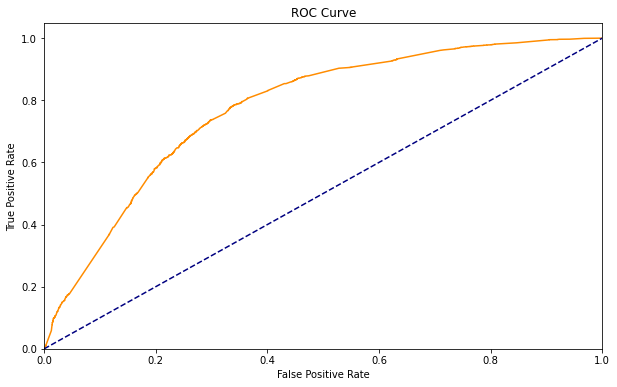

Brier Score:
1297.8837962758425


In [102]:
# evaluate neural network model using metrics similar to logistic and tree-based supervised learning models

# I am only going to evaluate nn2 and nn3 models. Below is the nn2 model

test_proba = [x[0] for x in nn2.predict(X_test_scaled)]
test_preds = [round(x) for x in test_proba]
test_preds_nn2 = test_preds.copy()
#test_proba = nn2.predict_proba(X_test)

output_test = f"""
METRICS FOR THE TESTING SET:
----------------------------
{confusion_matrix(y_test, test_preds)}

{classification_report(y_test, test_preds)}
"""
print(output_test)
print()
# print(test_preds)

#################################################

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba)

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("Brier Score:")
print(sum((y_test - test_proba)**2))

215/215 [==============================] - 1s 3ms/step

METRICS FOR THE TESTING SET:
----------------------------
[[2115 1081]
 [ 804 2860]]

              precision    recall  f1-score   support

           0       0.72      0.66      0.69      3196
           1       0.73      0.78      0.75      3664

    accuracy                           0.73      6860
   macro avg       0.73      0.72      0.72      6860
weighted avg       0.73      0.73      0.72      6860



AUC for the Model Test Set: 0.7683200138273278


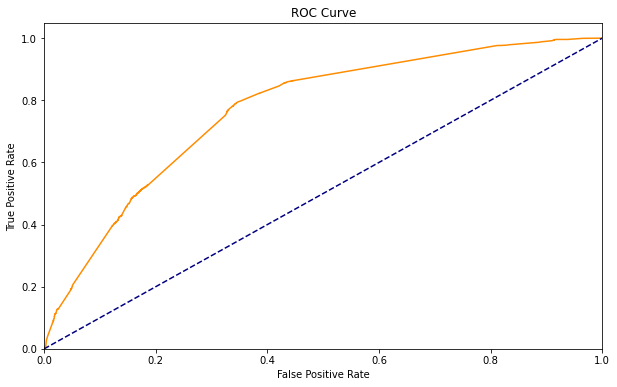

Brier Score:
1319.4954753809916


In [98]:
# nn3 model

test_proba = [x[0] for x in nn3.predict(X_test_scaled)]
test_preds = [round(x) for x in test_proba]
#test_proba = nn2.predict_proba(X_test)

output_test = f"""
METRICS FOR THE TESTING SET:
----------------------------
{confusion_matrix(y_test, test_preds)}

{classification_report(y_test, test_preds)}
"""
print(output_test)
print()
# print(test_preds)

#################################################

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba)

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("Brier Score:")
print(sum((y_test - test_proba)**2))

In [107]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE

# I picked the results of the nn2 model

import h5py

d1 = application_df.EIN.tolist()
d2 = test_preds_nn2

hf = h5py.File('AlphabetSoupCharity_Optimization.h5', 'w')

hf.create_dataset('EIN', data=d1)
hf.create_dataset('Myopia_Prediction', data=d2)

<HDF5 dataset "Myopia_Prediction": shape (6860,), type "<i4">

In [41]:
#compare to some other supervised learning models

# Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [42]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))

C:\Users\sajid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sajid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sajid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sajid\anaconda3\lib\site-packages\sklearn\metr


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[12842     0]
 [14597     0]]

                  precision    recall  f1-score   support

           0       0.47      1.00      0.64     12842
           1       0.00      0.00      0.00     14597

    accuracy                           0.47     27439
   macro avg       0.23      0.50      0.32     27439
weighted avg       0.22      0.47      0.30     27439

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[3196    0]
 [3664    0]]

                  precision    recall  f1-score   support

           0       0.47      1.00      0.64      3196
           1       0.00      0.00      0.00      3664

    accuracy                           0.47      6860
   macro avg       0.23      0.50      0.32      6860
weighted avg       0.22      0.47      0.30      6860

    

AUC for the Model Test Set: 0.5916543383241061


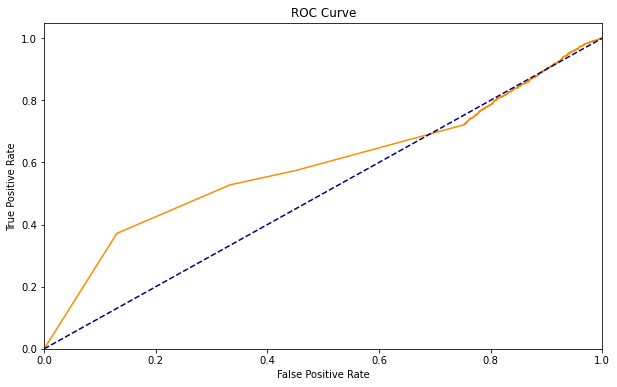

Brier Score:
1715.178511158238


In [43]:
lr = LogisticRegression(max_iter=10000)
evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 9195  3647]
 [ 4540 10057]]

                  precision    recall  f1-score   support

           0       0.67      0.72      0.69     12842
           1       0.73      0.69      0.71     14597

    accuracy                           0.70     27439
   macro avg       0.70      0.70      0.70     27439
weighted avg       0.70      0.70      0.70     27439

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2163 1033]
 [1282 2382]]

                  precision    recall  f1-score   support

           0       0.63      0.68      0.65      3196
           1       0.70      0.65      0.67      3664

    accuracy                           0.66      6860
   macro avg       0.66      0.66      0.66      6860
weighted avg       0.67      0.66      0.66      6860

    

AUC for the Model Test Set: 0.7244624831257412


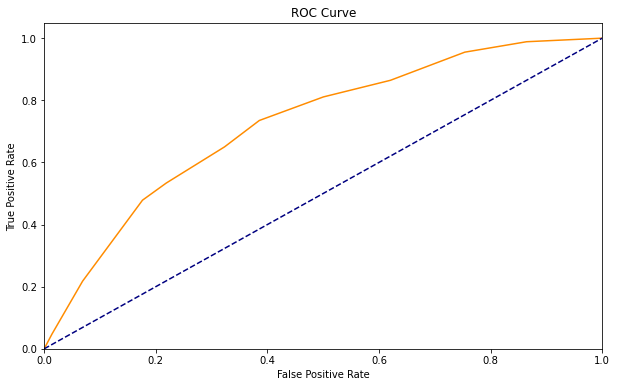

Brier Score:
1515.5099999999607


In [45]:
knn_model = KNeighborsClassifier(n_neighbors=10)
evaluateModel(knn_model, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[10430  2412]
 [ 2572 12025]]

                  precision    recall  f1-score   support

           0       0.80      0.81      0.81     12842
           1       0.83      0.82      0.83     14597

    accuracy                           0.82     27439
   macro avg       0.82      0.82      0.82     27439
weighted avg       0.82      0.82      0.82     27439

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2231  965]
 [1045 2619]]

                  precision    recall  f1-score   support

           0       0.68      0.70      0.69      3196
           1       0.73      0.71      0.72      3664

    accuracy                           0.71      6860
   macro avg       0.71      0.71      0.71      6860
weighted avg       0.71      0.71      0.71      6860

    

AUC for the Model Test Set: 0.710674138593001


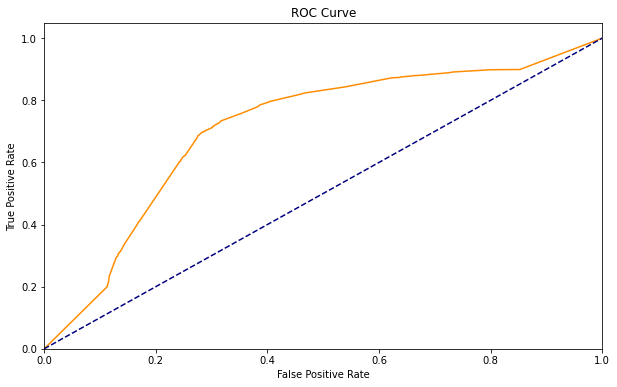

Brier Score:
1616.5236328662086


In [46]:
dt = DecisionTreeClassifier()
evaluateModel(dt, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[10259  2583]
 [ 2431 12166]]

                  precision    recall  f1-score   support

           0       0.81      0.80      0.80     12842
           1       0.82      0.83      0.83     14597

    accuracy                           0.82     27439
   macro avg       0.82      0.82      0.82     27439
weighted avg       0.82      0.82      0.82     27439

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2215  981]
 [1008 2656]]

                  precision    recall  f1-score   support

           0       0.69      0.69      0.69      3196
           1       0.73      0.72      0.73      3664

    accuracy                           0.71      6860
   macro avg       0.71      0.71      0.71      6860
weighted avg       0.71      0.71      0.71      6860

    

AUC for the Model Test Set: 0.7514829877412267


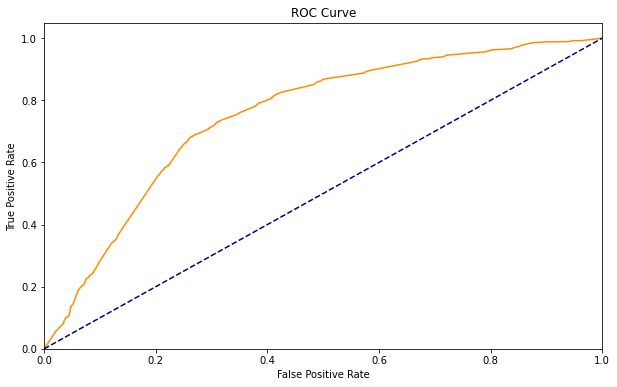

Brier Score:
1408.116628072724


In [47]:
rf = RandomForestClassifier(random_state=42, n_estimators=50)
evaluateModel(rf, X_train, X_test, y_train, y_test)

In [117]:
features = df_full.drop("IS_SUCCESSFUL", axis=1).columns
sorted(list(zip(rf.feature_importances_, features)))

[(5.2345737173701355e-05, 'USE_CASE_Other'),
 (9.648928621658151e-05, 'AFFILIATION_Other'),
 (0.0002190733834634042, 'STATUS'),
 (0.0004253640660941195, 'AFFILIATION_Regional'),
 (0.0005232268469243093, 'SPECIAL_CONSIDERATIONS_Y'),
 (0.0005382941459808632, 'SPECIAL_CONSIDERATIONS_N'),
 (0.000557652794232421, 'ORGANIZATION_Corporation'),
 (0.0005970847863399026, 'AFFILIATION_National'),
 (0.0012265943131974841, 'AFFILIATION_Family/Parent'),
 (0.001460985447352137, 'USE_CASE_Heathcare'),
 (0.0020331731092314157, 'APPLICATION_TYPE_Other'),
 (0.002122405687881919, 'INCOME_AMT_50M+'),
 (0.002452418004598438, 'INCOME_AMT_5M-10M'),
 (0.002771739615164617, 'ORGANIZATION_Co-operative'),
 (0.0028324729994679623, 'INCOME_AMT_10M-50M'),
 (0.003277230327963491, 'INCOME_AMT_10000-24999'),
 (0.003416489892450364, 'USE_CASE_CommunityServ'),
 (0.0042001049417663095, 'APPLICATION_TYPE_T8'),
 (0.0043788714744586905, 'APPLICATION_TYPE_T7'),
 (0.005630844248748165, 'INCOME_AMT_1M-5M'),
 (0.0058382938274413


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 8706  4136]
 [ 3505 11092]]

                  precision    recall  f1-score   support

           0       0.71      0.68      0.70     12842
           1       0.73      0.76      0.74     14597

    accuracy                           0.72     27439
   macro avg       0.72      0.72      0.72     27439
weighted avg       0.72      0.72      0.72     27439

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2138 1058]
 [ 894 2770]]

                  precision    recall  f1-score   support

           0       0.71      0.67      0.69      3196
           1       0.72      0.76      0.74      3664

    accuracy                           0.72      6860
   macro avg       0.71      0.71      0.71      6860
weighted avg       0.72      0.72      0.71      6860

    

AUC for the Model Test Set: 0.754817831445967


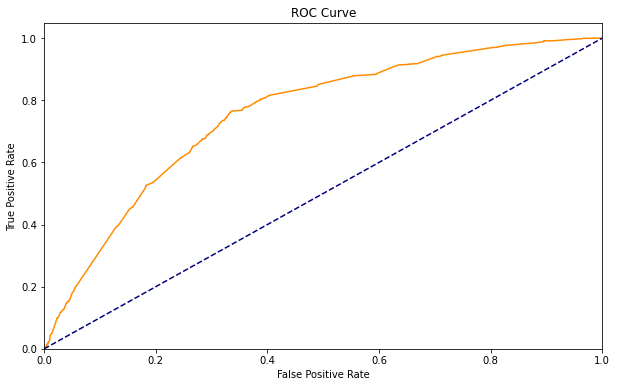

Brier Score:
1698.738371308504


In [48]:
ada = AdaBoostClassifier(random_state=42)
evaluateModel(ada, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 9153  3689]
 [ 2871 11726]]

                  precision    recall  f1-score   support

           0       0.76      0.71      0.74     12842
           1       0.76      0.80      0.78     14597

    accuracy                           0.76     27439
   macro avg       0.76      0.76      0.76     27439
weighted avg       0.76      0.76      0.76     27439

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2142 1054]
 [ 853 2811]]

                  precision    recall  f1-score   support

           0       0.72      0.67      0.69      3196
           1       0.73      0.77      0.75      3664

    accuracy                           0.72      6860
   macro avg       0.72      0.72      0.72      6860
weighted avg       0.72      0.72      0.72      6860

    

AUC for the Model Test Set: 0.7765297762350317


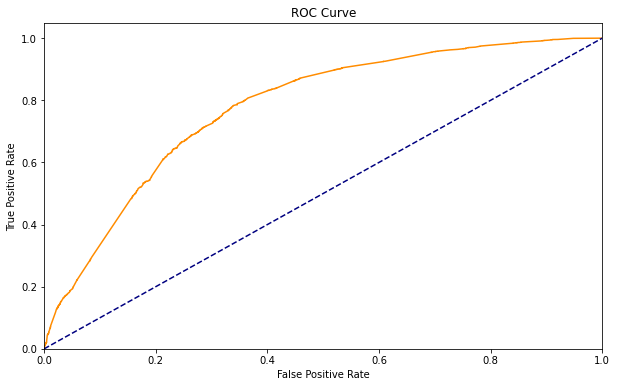

Brier Score:
1300.3893739072157


In [49]:
xgb = XGBClassifier(random_state=42)
evaluateModel(xgb, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[ 8845  3997]
 [ 3045 11552]]

                  precision    recall  f1-score   support

           0       0.74      0.69      0.72     12842
           1       0.74      0.79      0.77     14597

    accuracy                           0.74     27439
   macro avg       0.74      0.74      0.74     27439
weighted avg       0.74      0.74      0.74     27439

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[2134 1062]
 [ 830 2834]]

                  precision    recall  f1-score   support

           0       0.72      0.67      0.69      3196
           1       0.73      0.77      0.75      3664

    accuracy                           0.72      6860
   macro avg       0.72      0.72      0.72      6860
weighted avg       0.72      0.72      0.72      6860

    

AUC for the Model Test Set: 0.7810900959031759


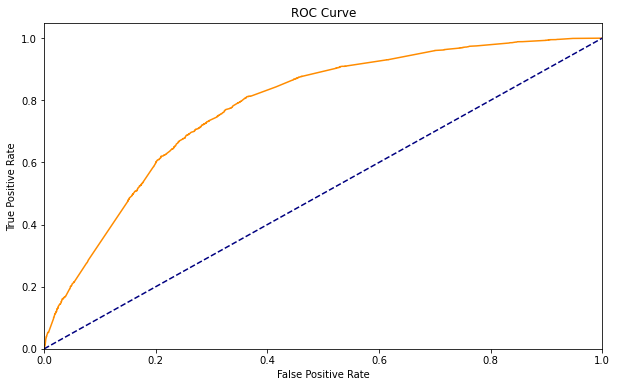

Brier Score:
1282.9440584761792


In [50]:
lgb = LGBMClassifier(random_state=42)
evaluateModel(lgb, X_train, X_test, y_train, y_test)